### Simple Linear Regression using Closed Form Equation

This equation is derived from <b style = "color:orange">OLS(Ordinary Least Squares)</b>. We will build a class from <b style = "color:orange">scratch</b> based on the equations and perform all the necessary steps here.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
class LinRegOLS:
    
    def __init__(self):               #Constructor
        self.m = None 
        self.b = None
        
    def fit(self,X_train,y_train):    #This will give us the values of m and b by training the dataset.

        num = 0
        den = 0
        mean_x = X_train.mean()
        mean_y = y_train.mean()
        
        for i in range(X_train.shape[0]):
            num += ((X_train[i] - mean_x) * (y_train[i] - mean_y))
            den += ((X_train[i] - mean_x) * (X_train[i] - mean_x))
            
        self.m = num / den
        self.b = mean_y - (self.m * mean_x)
        
        #print("m is ",self.m)
        #print("b is ",self.b)
    
    def predict(self,X_test):
        return ((self.m * X_test) + self.b)  


In [4]:
df = pd.read_csv('placement.csv')

In [5]:
df.sample(5)

,cgpa,package
30,7.36,3.26
33,6.35,2.73
175,7.04,3.50
145,5.84,2.18
197,7.21,3.24


#### <b style = "color:purple">Extracting X and y from the dataframe as numpy arrays.</b>

In [6]:
X = df.iloc[:,0].values
y = df.iloc[:,-1].values

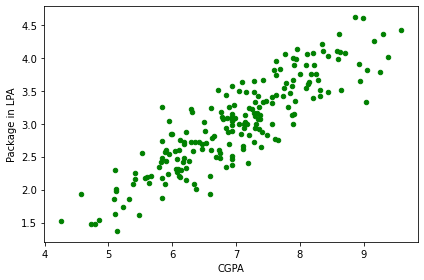

In [7]:
plt.scatter(X,y,c='green',s=20)
plt.xlabel('CGPA')
plt.ylabel('Package in LPA')
plt.tight_layout()

In [6]:
X

array([6.89, 5.12, 7.82, 7.42, 6.94, 7.89, 6.73, 6.75, 6.09, 8.31, 5.32,
       6.61, 8.94, 6.93, 7.73, 7.25, 6.84, 5.38, 6.94, 7.48, 7.28, 6.85,
       6.14, 6.19, 6.53, 7.28, 8.31, 5.42, 5.94, 7.15, 7.36, 8.1 , 6.96,
       6.35, 7.34, 6.87, 5.99, 5.9 , 8.62, 7.43, 9.38, 6.89, 5.95, 7.66,
       5.09, 7.87, 6.07, 5.84, 8.63, 8.87, 9.58, 9.26, 8.37, 6.47, 6.86,
       8.2 , 5.84, 6.6 , 6.92, 7.56, 5.61, 5.48, 6.34, 9.16, 7.36, 7.6 ,
       5.11, 6.51, 7.56, 7.3 , 5.79, 7.47, 7.78, 8.44, 6.85, 6.97, 6.94,
       8.99, 6.59, 7.18, 7.63, 6.1 , 5.58, 8.44, 4.26, 4.79, 7.61, 8.09,
       4.73, 6.42, 7.11, 6.22, 7.9 , 6.79, 5.83, 6.63, 7.11, 5.98, 7.69,
       6.61, 7.95, 6.71, 5.13, 7.05, 7.62, 6.66, 6.13, 6.33, 7.76, 7.77,
       8.18, 5.42, 8.58, 6.94, 5.84, 8.35, 9.04, 7.12, 7.4 , 7.39, 5.23,
       6.5 , 5.12, 5.1 , 6.06, 7.33, 5.91, 6.78, 7.93, 7.29, 6.68, 6.37,
       5.84, 6.05, 7.2 , 6.1 , 5.64, 7.14, 7.91, 7.19, 7.91, 6.76, 6.93,
       4.85, 6.17, 5.84, 6.07, 5.66, 7.57, 8.28, 6.

In [7]:
X.shape

(200,)

#### <b style = "color:purple">train_test_split()</b>

In this step we divide our dataset into training and testing data. We train our model using training data and to validate our model we use the testing data.

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [9]:
X_train.shape

(170,)

#### <b style = "color:purple">Train</b>

In [10]:
lr = LinRegOLS()                   #Creating a object.

In [11]:
lr.fit(X_train,y_train)            #Training the model using training dataset.

#### <b style = "color:purple">Predict</b>

In [12]:
y_pred = lr.predict(X_test)

In [13]:
y_pred

array([3.8782834 , 3.08023526, 2.37147922, 2.56122493, 1.64040015,
       1.76317679, 2.05895687, 2.91839333, 3.74992601, 2.92397408,
       4.07919062, 3.49879197, 2.95745862, 2.38822148, 3.17510811,
       3.45414592, 1.93059947, 3.23091568, 2.96303938, 3.40391912,
       2.54448266, 3.15278509, 2.8458435 , 3.10813904, 3.67179542,
       2.85700501, 3.48204971, 3.33136929, 3.90618718, 1.94734174])

In [14]:
lr.predict(X_test[1:4])

array([3.08023526, 2.37147922, 2.56122493])